<a href="https://colab.research.google.com/github/leemhoon00/prac_keras_1/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4%EC%8B%A4%EC%8A%B5_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코드 3-1 IMDB 데이터셋 로드하기

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


코드 3-2 정수 시퀀스를 이진 행렬로 인코딩하기

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블을 벡터로 바꾸기

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

코드 3-3 모델 정의하기

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

코드 3-4 모델 컴파일하기

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

코드 3-7 검증 세트 준비하기

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

코드 3-8 모델 훈련하기

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 43ms/step - loss: 0.5512 - acc: 0.7598 - val_loss: 0.4209 - val_acc: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3304 - acc: 0.9008 - val_loss: 0.3196 - val_acc: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2379 - acc: 0.9241 - val_loss: 0.2986 - val_acc: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1842 - acc: 0.9411 - val_loss: 0.2774 - val_acc: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1472 - acc: 0.9534 - val_loss: 0.2878 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1217 - acc: 0.9623 - val_loss: 0.3108 - val_acc: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1020 - acc: 0.9706 - val_loss: 0.3076 - val_acc: 0.8862
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0858 - a

코드 3-9 훈련과 검증 손실 그리기

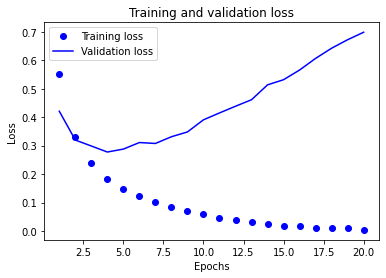

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') #bo는 파란색 점
plt.plot(epochs, val_loss,'b',label='Validation loss') #b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

코드 3-10 훈련과 검증 정확도 그리기

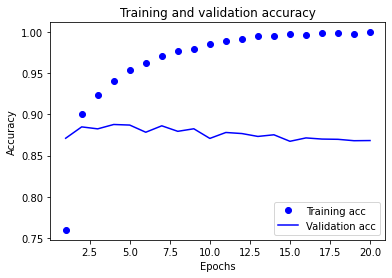

In [11]:
plt.clf() #그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()

코드 3-11 모델을 처음부터 다시 훈련하기

In [12]:
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5335 - accuracy: 0.7758
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.3178 - accuracy: 0.9045
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2274 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2898 - accuracy: 0.8838


훈련된 모델로 새로운 데이터에 대해 예측하기

In [13]:
model.predict(x_test)

array([[0.17612515],
       [0.99281573],
       [0.84353364],
       ...,
       [0.14393286],
       [0.08039363],
       [0.5377607 ]], dtype=float32)